# Huge Stock Market Dataset

In this notebook will be performed:
1. Importing Libraries
2. Preprocessing
3. Tesla Stock Market Analyis
4. Tesla ARIMA (AutoRegressive Integrated Moving Average) Time Series Prediction
5. Microsoft Stock Market Analyis
6. Microsoft ARIMA (AutoRegressive Integrated Moving Average) Time Series Prediction

# Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

Python import statements are used to import various libraries and modules into the current Python session. The following are brief explanations of each import statement:

Importing NumPy and assigning it the name "np" imports the NumPy library. Python's NumPy library is a popular tool for numerical computing.

The import pandas as pd command imports the Pandas library and gives it the name "pd". Python's Pandas library allows you to manipulate and analyze data.

The import os command imports the Python module "os", which provides a way to interact with the file system.

Check_output is imported from the subprocess module, which provides a way to run external commands and capture their output.

This imports the Seaborn library, which is a visualization library based on Matplotlib that provides a high-level interface for creating statistical graphics.

Import matplotlib.pyplot as plt: This imports the Pyplot module from the Matplotlib library, which provides static, animated, and interactive visualizations.

This imports the warnings Python module, which provides a way to handle code-generated warnings.

lag_plot imports the lag_plot function from the Pandas plotting module, which creates a lag plot of a time series.

Import datetime from pandas: This imports the datetime function from the Pandas library, which is used to work with dates and times.

It imports the ARIMA class from the statsmodels library, which is used to fit an autoregressive integrated moving average (ARIMA) model to time series data.

Mean_squared_error: This imports the mean_squared_error function from the scikit-learn library, which computes the mean squared error (MSE) of a regression model.

In [2]:
warnings.filterwarnings('ignore')

In Python, warnings.filterwarnings('ignore') suppresses warning messages. Python's warning module provides a way to handle warning messages generated during program execution. They can be useful for debugging or identifying potential issues in the code, but sometimes they can be distracting.

By using the filterwarnings function, warning messages can be filtered based on certain criteria. By passing the argument 'ignore' to the function, all warning messages will be ignored and not printed to the console.

It is useful when the user is confident that the code is working as intended and does not wish to be distracted by warning messages. It is important to use this feature wisely, as warning messages can sometimes indicate actual code issues that need to be addressed.

# Preprocessing

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

print(os.listdir("../input"))

print(check_output(["ls", "../input/Data"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

['Stocks', 'ETFs', 'Data']
ETFs
Stocks



A Kaggle notebook contains a series of comments and Python code to provide information about the Python environment and the input and output directories.

The first three comments provide context for the notebook environment and the code's purpose. In the comments, it is explained that the notebook runs in a Python 3 environment and includes a number of useful analytics libraries. In the third comment, Kaggle provides a link to the Docker image used to define the Python environment.

The next two comments list the files in the input directory. The print(os.listdir("../input") line uses the os module to list the contents of the input directory, where Kaggle stores the input data for individual competitions or projects. Print(check_output(["ls", "../input/Data"]).decode("utf8")) runs the ls command in the input directory, specifically in a subdirectory called "Data", and prints the results.

In the final comment, it is explained that the notebook will save any output generated by the code. A code can generate data files, visualizations, or other output.

In [4]:
#print(check_output(["ls", "../input/Data/Stocks"]).decode("utf8"))

# Tesla Stock Market Analyis

In [5]:
df = pd.read_csv("../input/Data/Stocks/tsla.us.txt")
df.head()

Date   Open   High    Low  Close    Volume  OpenInt
0  2010-06-28  17.00  17.00  17.00  17.00         0        0
1  2010-06-29  19.00  25.00  17.54  23.89  18783276        0
2  2010-06-30  25.79  30.42  23.30  23.83  17194394        0
3  2010-07-01  25.00  25.92  20.27  21.96   8229863        0
4  2010-07-02  23.00  23.10  18.71  19.20   5141807        0

Using the Pandas Python library, this code reads and displays the contents of a CSV file.

In the first line of code, df = pd.read_csv("../input/Data/Stocks/tsla.us.txt"), the Pandas library's read_csv() function is used to read the contents of a CSV file located at "../input/Data/Stocks/tsla.us.txt". During the import statement at the beginning of the code, the pd abbreviation for Pandas was defined. Data from the CSV file is stored in a Pandas DataFrame object named df.

Using the head() function, the second line of code displays the first five rows of the DataFrame. Using the head() function, you can quickly preview the contents of a DataFrame and ensure that the data has been read correctly. As a default, head() shows the first five rows of the DataFrame, but you can pass in a different number to show more or fewer rows.

In [6]:
print(df.head())
print(df.shape)
print(df.columns)

         Date   Open   High    Low  Close    Volume  OpenInt
0  2010-06-28  17.00  17.00  17.00  17.00         0        0
1  2010-06-29  19.00  25.00  17.54  23.89  18783276        0
2  2010-06-30  25.79  30.42  23.30  23.83  17194394        0
3  2010-07-01  25.00  25.92  20.27  21.96   8229863        0
4  2010-07-02  23.00  23.10  18.71  19.20   5141807        0
(1858, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')


A Pandas DataFrame df read from a CSV file is displayed in this code.

In the first line of code, print(df.head()), the head() function is used to print the first five rows of the DataFrame. It is a quick way to preview the data and ensure that it has been read correctly.

A second line of code, print(df.shape), prints the shape of the DataFrame, which is a tuple containing the number of rows and columns. The shape of a DataFrame with 100 rows and 5 columns would be (100, 5).

A third line of code, print(df.columns), prints the names of the columns in the DataFrame. It is useful for verifying that the column names match the expected names. One-dimensional labeled arrays are represented by Pandas Index objects, which are a special type of data structure.

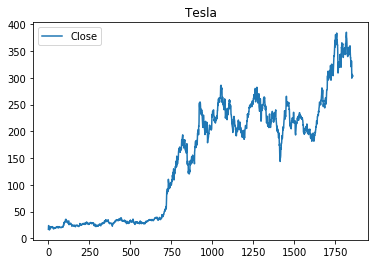

In [7]:
df[['Close']].plot()
plt.title("Tesla")
plt.show()

To create a simple line plot of Tesla stock closing prices, this code uses Matplotlib and Pandas libraries.

df[['Close']].plot() selects the 'Close' column from the DataFrame using double square brackets [[ ]] and plots the data using the plot() function. This plot shows the closing prices over time.

By using the title() function from the Matplotlib library, plt.title("Tesla") sets the title of the plot to "Tesla". To provide some context for the data, you can add a title to the plot.

Plt.show() displays the plot to the user in the third line of code. It blocks the execution of any additional code until the plot window is closed by the user.

This code provides a quick and easy way to visualize Tesla stock closing prices and get an idea of how the price has changed over time.

Text(0.5, 1.0, 'Tesla Cumulative Returns')

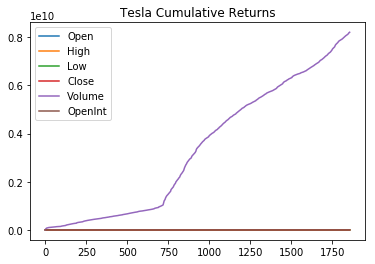

In [8]:
# Comulative Return
dr = df.cumsum()
dr.plot()
plt.title('Tesla Cumulative Returns')

Using Matplotlib and Pandas libraries, this code creates a line plot of Tesla's cumulative returns.

dr = df.cumsum() creates a new DataFrame named dr that contains the cumulative sum of the data in the original DataFrame df. Each value in dr represents the sum of all the values that came before it in the corresponding column in df. As a result, the DataFrame dr contains Tesla stock's cumulative returns.

Using the plot() function, the second line of code, dr.plot(), creates a line plot of the data in the dr DataFrame. Over time, the cumulative returns for Tesla stock can be seen on the resulting plot.

Plt.title('Tesla Cumulative Returns') sets the title of the plot to "Tesla Cumulative Returns" using the title() function from Matplotlib. By doing this, we provide some context for the data and make it clear what we are plotting.

This code provides a quick and easy way to visualize Tesla stock's cumulative returns and see how the stock has performed over time.

Text(0.5, 1.0, 'Tesla Autocorrelation plot')

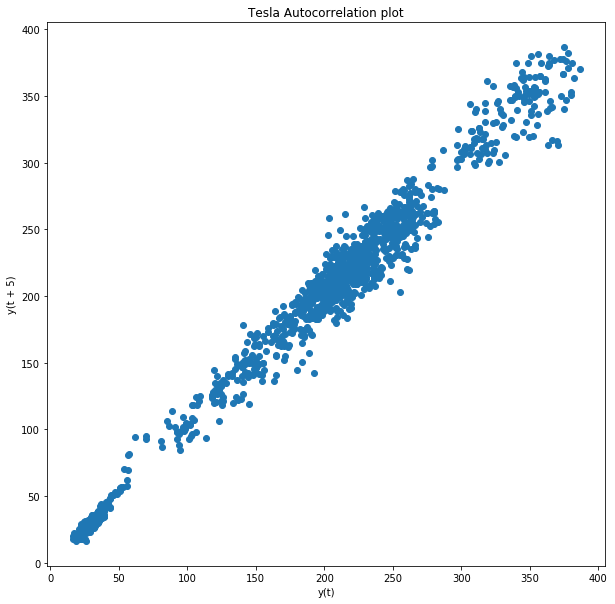

In [9]:
plt.figure(figsize=(10,10))
lag_plot(df['Open'], lag=5)
plt.title('Tesla Autocorrelation plot')

Tesla stock opening prices are plotted using Matplotlib and Pandas libraries.

Using the figure() function from the Matplotlib library, plt.figure(figsize=(10,10)) creates a new figure window 10 inches by 10 inches. By doing so, the plot size will be larger than it is by default.

In the second line of code, lag_plot(df['Open'], lag=5), the Pandas plotting module creates a lag plot of Tesla stock's opening price using the lag_plot() function. A lag plot visualizes the autocorrelation of data by plotting each data point against the value of the same variable at a previous time step. The lag=5 argument specifies a lag of 5 time steps between each data point and its previous value.

With the third line of code, plt.title('Tesla Autocorrelation plot'), the title of the plot is set to "Tesla Autocorrelation plot" using the title() function from the Matplotlib library. By doing this, some context is provided for the plot and it is clear what is being plotted.

With this code, you can quickly and easily visualize the autocorrelation of Tesla stock opening prices and see how their values are correlated with each other.

## ARIMA (AutoRegressive Integrated Moving Average) for Time Series Prediction

In [10]:
df['Date'][1857]

'2017-11-10'

As you can see, this code retrieves the value in the 'Date' column of the Pandas DataFrame df at row 1857.

This code uses bracket notation ([ ]) to select a specific value from a Pandas DataFrame. df['Date'] selects the entire 'Date' column of the DataFrame, and [1857] selects the value in row 1857.

The output will be the value of the 'Date' column in the 1857th row of the DataFrame. For data exploration and analysis, this code can be used to access specific values within a DataFrame based on their row and column positions.

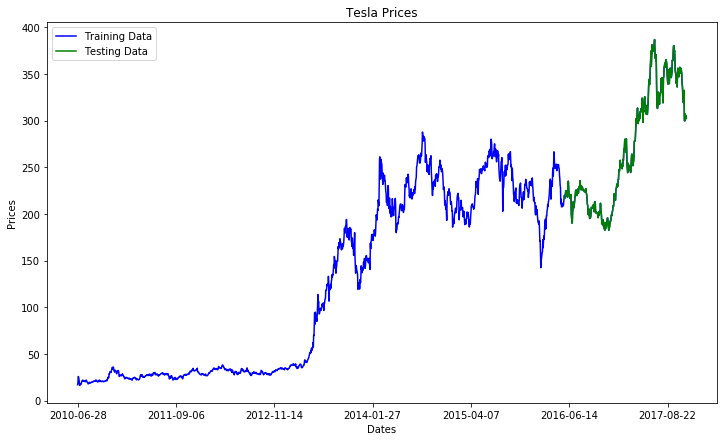

In [11]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Tesla Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
plt.xticks(np.arange(0,1857, 300), df['Date'][0:1857:300])
plt.legend()

This code visualizes and splits the given dataset into training and testing sets. This is how the code is broken down:

The first line of code splits the dataset df into two parts, train_data and test_data. Data is split in an 80:20 ratio, with 80% used for training and 20% for testing.

Using the matplotlib library, the next few lines create a plot. With figure(), you can create a new figure of the specified size. Using title(), xlabel(), and ylabel(), you can set the plot's title, x-axis label, and y-axis label.

Plotting the data on the graph is done using the plot() function. df['Open'] represents the training data and is plotted in blue. Data from test_data['Open'] is plotted in green.

The xticks() function sets the tick marks on the x-axis. Using the np.arange() function, a sequence of numbers from 0 to 1857 is generated in increments of 300. In the df['Date'] column, these numbers represent the indices of the dates that will be used as tick marks. Every 300th date is extracted from the df['Date'] column using the df['Date'][0:1857:300] expression.

To create a legend for the plot, the legend() function is used. Labels are specified for each line in the plot using the label argument. In the legend, it is shown which line corresponds to the training data and which line corresponds to the testing data.

In [12]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

It defines a function smape_kun that computes the symmetric mean absolute percentage error (SMAPE) between two arrays of numbers, y_true and y_pred. The code is broken down as follows:

Smape_kun is defined using the def keyword.

It takes two arguments, y_true and y_pred, which are arrays of numbers.

This function computes the absolute difference between the predicted values y_pred and the true values y_true.

The * 200/ (np.abs(y_pred) + np.abs(y_true)) expression computes the weight of each term in the SMAPE formula.

In the arrays, the weights are averaged using the np.mean() function. SMAPE's final score is calculated in this way.

As a single value, the function returns the SMAPE score.

An SMAPE is a measure of the percentage error between two arrays of numbers, which is symmetric around zero. Numerator is the absolute difference between predicted and true values; denominator is the sum of predicted and true values. The SMAPE ranges from 0 to 200%, where 0% indicates a perfect match between the predicted and true values, and 200% indicates a complete disagreement. Machine learning models that predict numerical values, such as stock prices, sales figures, or weather, can be evaluated with the smape_kun function.

In [13]:
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values

# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 40.550
Symmetric mean absolute percentage error: 26.015


The code trains an ARIMA (Autoregressive Integrated Moving Average) model on a training dataset and evaluates its performance on a test dataset. The code is broken down as follows:

Using the .values method, the first two lines of code convert the Open prices from the train_data and test_data dataframes into numpy arrays. Train_ar and test_ar are assigned these arrays.

Train_ar is used to initialize the history list. The ARIMA model will use this list to make predictions based on previous observations.

Each value in test_ar is iterated over using a for loop. Each value in the history list is fitted with an ARIMA model using an order of (5,1,0). Next, a prediction for the next value is generated using the forecast() method.

In the predictions list, the predicted value is added, while in the history list, the true value is added.

The mean squared error (MSE) between predicted and true values is calculated using the mean_squared_error() function from the sklearn.metrics library. The console displays this error.

A symmetric mean absolute percentage error (SMAPE) between predicted and true values is calculated using the smape_kun() function. An error message is printed to the console.

ARIMA is a time-series forecasting method that uses past observations to predict future values. Three parameters are represented by the order argument (p,d,q), where p is the number of autoregressive terms, d is the degree of differencing, and q is the number of moving average terms. With the train_ar array of Open prices, the ARIMA model is trained on the train_data. Using the test_ar array of Open prices, the model predicts the values in the test_data. MSE and SMAPE are used to evaluate the model's performance.

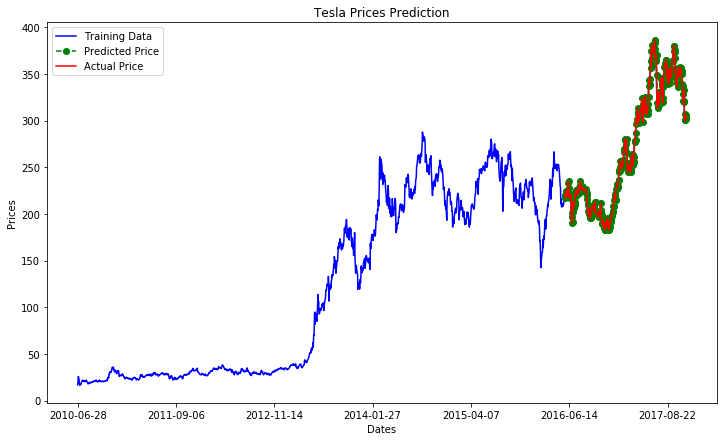

In [14]:
plt.figure(figsize=(12,7))
plt.plot(df['Open'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,1857, 300), df['Date'][0:1857:300])
plt.legend()

This code plots Tesla stock price predictions versus actual prices over time. The code is broken down as follows:

A new figure with a size of 12 inches by 7 inches is created by the figure() function.

To create three lines on the graph, plot() is used three times. 'Training Data' is plotted in blue on the first line. Predicted prices are plotted as green circles with a dashed line connecting them and labeled 'Predicted Price' on the second line. Plotted in red and labeled 'Actual Price', the third line represents the actual prices. Df['Open'] data is plotted in green, and it represents the entire dataset.

Title(), xlabel(), and ylabel() are used to set the plot's title, x-axis label, and y-axis label.

The xticks() function sets the tick marks on the x-axis. Using the np.arange() function, a sequence of numbers from 0 to 1857 is generated in increments of 300. In the df['Date'] column, these numbers represent the indices of the dates that will be used as tick marks. Every 300th date is extracted from the df['Date'] column using the df['Date'][0:1857:300] expression.

To create a legend for a plot, use the legend() function. Labels are specified for each line in the plot using the label argument. A legend shows which line corresponds to the training data, predicted prices, and actual prices.

A plot shows the predicted and actual prices of Tesla stock over time, with the predicted prices represented by green circles connected by a dashed line. It provides an intuitive way to evaluate the ARIMA model's performance by comparing predicted and actual prices visually.

In [15]:
#test_data['Date'][0:1856:10]

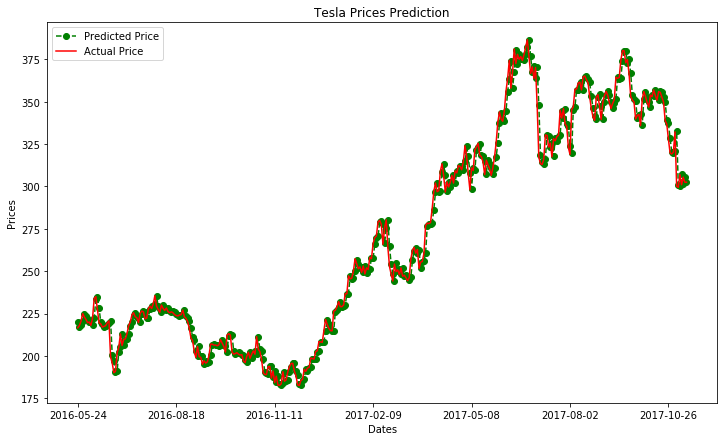

In [16]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.xticks(np.arange(1486,1856, 60), df['Date'][1486:1856:60])
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

Based on the test data portion of the dataset, this code creates a plot showing Tesla stock prices predicted and actual over time. Below is a breakdown of the code:

A new figure with a size of 12 inches by 7 inches is created by the figure() function.

Two lines are created on the graph by using the plot() function twice. Predicted prices are plotted as green circles with a dashed line connecting them, labeled 'Predicted Price'. In the second line, the actual prices are plotted in red and labeled 'Actual Price'.

The xticks() function sets the tick marks on the x-axis. It is used to generate a sequence of numbers between 1486 and 1856 in increments of 60 using the np.arange() function. Numbers represent the indices for the dates in the df['Date'] column that will be used as tick marks. Every 60th date is extracted from the df['Date'] column using the df['Date'][1486:1856:60] expression.

Title(), xlabel(), and ylabel() are used to set the plot's title, x-axis label, and y-axis label.

The legend() function creates a legend for the plot. Labels are specified for each line in the plot using the label argument. There is a legend showing which line corresponds to the predicted and actual prices.

A plot shows the predicted and actual prices of Tesla stock over time, with the predicted prices represented by green circles connected by dashed lines. Zooming in on the test data portion of the dataset allows for a closer look at the ARIMA model's performance. Comparing the predicted and actual prices on the plot is an intuitive way to evaluate the ARIMA model's performance.

# Microsoft Stock Market Analyis

In [17]:
df = pd.read_csv("../input/Data/Stocks/msft.us.txt").fillna(0)
df.head()

Date     Open     High      Low    Close      Volume  OpenInt
0  1986-03-13  0.06720  0.07533  0.06720  0.07533  1371330506        0
1  1986-03-14  0.07533  0.07533  0.07533  0.07533   409569463        0
2  1986-03-17  0.07533  0.07533  0.07533  0.07533   176995245        0
3  1986-03-18  0.07533  0.07533  0.07533  0.07533    90067008        0
4  1986-03-19  0.07533  0.07533  0.07533  0.07533    63655515        0

Using the pandas library, this code reads historical stock price data for Microsoft Corporation (MSFT) from a comma-separated value (CSV) file. The code is broken down as follows:

A pandas DataFrame called df is created after reading the data from the specified CSV file using the pd.read_csv() function.

When fillna(0) is called on the DataFrame, it replaces any missing or NaN values with 0.

Using the head() method, the DataFrame displays the first 5 rows of the dataset. The data can be viewed in this way to verify that it has been loaded correctly and to get an idea of how it looks.

Among the columns in the CSV file are the date, the opening price, the closing price, the high price, the low price, and the trading volume. The data may be arranged chronologically, with the earliest date at the top and the latest date at the bottom. When missing values occur due to errors in data collection or incomplete data, the fillna(0) method is used to handle them. A DataFrame's head() method displays the first few rows, allowing you to identify any potential issues with the data, such as missing values or formatting errors.

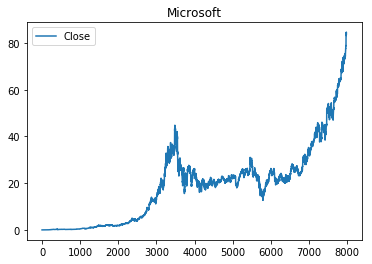

In [18]:
df[['Close']].plot()
plt.title("Microsoft")
plt.show()

Using the Close column of the DataFrame, this code creates a simple line plot of the closing prices for Microsoft Corporation (MSFT). A breakdown of the code can be found here:

To select only the Close column in a DataFrame, use the [['Close']] indexing syntax.

A line plot of the closing prices over time is created using the plot() function on the selected column.

To set the plot's title to "Microsoft", use the title() function.

A plot is displayed on the screen by calling the show() function.

This plot shows the closing prices for Microsoft over time as a simple line graph. In this type of plot, you can visualize the trend of a stock price over time in order to identify patterns and potential investment opportunities.

Text(0.5, 1.0, 'Microsoft Cumulative Returns')

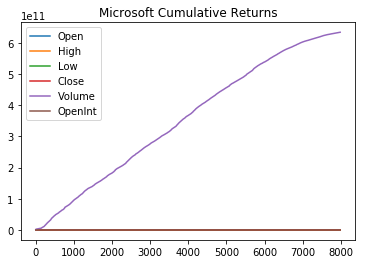

In [19]:
# Comulative Return
dr = df.cumsum()
dr.plot()
plt.title('Microsoft Cumulative Returns')

Using the matplotlib library, this code computes the cumulative returns for Microsoft Corporation (MSFT). Code breakdown:

Cumulative sum of closing prices is computed by calling the cumsum() function on the DataFrame df. A new DataFrame called dr is created.

A line plot of cumulative returns is created using the plot() function on the dr DataFrame.

The title() function sets the plot's title to "Microsoft Cumulative Returns".

It is assumed that the show() function will be called later, but it is not explicitly called.

A line graph shows the cumulative returns for Microsoft over time. A cumulative return measures the total return on an investment over time, taking both capital gains and dividends into account. In addition to helping to identify trends and potential investment opportunities, this type of plot is useful for visualizing the long-term performance of an investment.

Text(0.5, 1.0, 'Microsoft Autocorrelation plot')

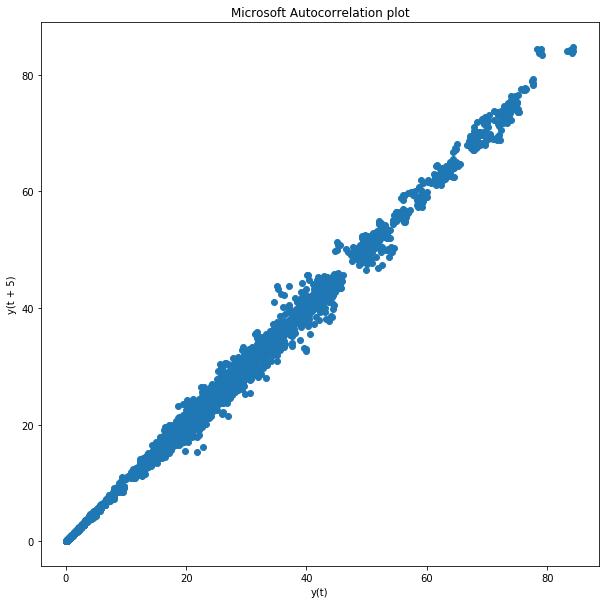

In [20]:
plt.figure(figsize=(10,10))
lag_plot(df['Open'], lag=5)
plt.title('Microsoft Autocorrelation plot')

With the matplotlib and pandas libraries, this code creates an autocorrelation plot for the opening prices of Microsoft Corporation (MSFT). The code is broken down as follows:

In this case, the figure(figsize=(10,10)) function creates a new figure with a specified size of 10 inches by 10 inches.

In order to create an autocorrelation plot of opening prices, the lag_plot() function is called. A lag plot shows the relationship between a variable and its lagged values.

To select only the Open column of a DataFrame, use the df['Open'] indexing syntax.

To display the autocorrelation at lag 5, the lag argument is set to 5.

Title() sets the plot's title to "Microsoft Autocorrelation Plot".

It is assumed that the show() function will be called later, but it is not explicitly called.

This plot shows the autocorrelation of Microsoft's opening prices. Plotting the relationship between opening prices and lagged values can help identify patterns and potential investment opportunities. An autocorrelation of positive value at a specific lag indicates that prices tend to be similar at that lag, whereas a correlation of negative value at that lag indicates that prices tend to be opposite. In the absence of autocorrelation, the variable and its lagged values do not have any relationship.

## ARIMA (AutoRegressive Integrated Moving Average) for Time Series Prediction

In [21]:
df['Date'][7982]

'2017-11-10'

DataFrame df for Microsoft Corporation (MSFT) uses indexing syntax to retrieve a specific date value from the Date column. A breakdown of the code can be found here:

DataFrame df is indexed using the df['Date'] indexing syntax.

To retrieve the date value at index 7982 in the Date column, use the indexing syntax [7982].

A single date value is returned from the Date column.

Each day that MSFT stock was traded on the market, ordered chronologically, is likely to be contained in the Date column of the df DataFrame. This code enables easy access to MSFT stock prices on a specific date by retrieving a specific date value using indexing syntax. The specific use case for this code depends on the user's needs, but it could be useful for analyzing price movements around significant events, such as company announcements.

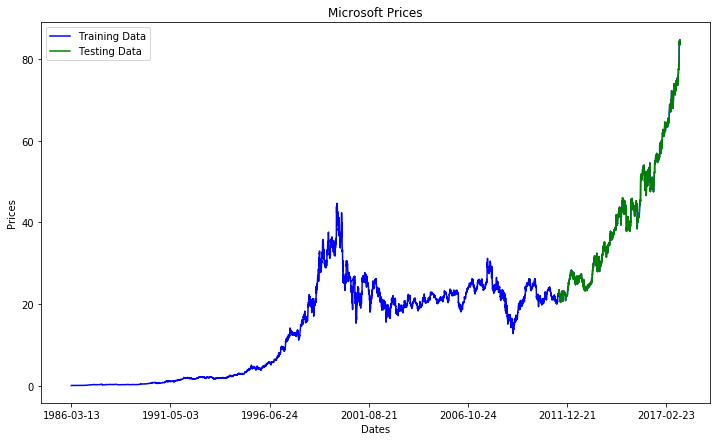

In [22]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Microsoft Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
plt.xticks(np.arange(0,7982, 1300), df['Date'][0:7982:1300])
plt.legend()

Matplotlib is used to visualize the split between the Microsoft Corporation (MSFT) stock price data and the training data. A breakdown of the code can be found here:

Using indexing syntax, the first line of code splits the DataFrame df into two parts. Train_data contains 80% of the data (to the index at the end of the DataFrame), while test_data contains the remaining 20% (after the index at the end of the DataFrame).

Figure(figsize=(12,7)) creates a new figure with a size of 12 inches by 7 inches.

Title(), xlabel(), and ylabel() are used to set the plot's title, x-axis label, and y-axis label.

To create two lines on the graph, two plot() functions are called. The first line represents the training data, which is plotted in blue and labelled 'Training Data'. On the second line, the testing data is plotted in green and labelled as 'Testing Data'. Data from df['Open'] is plotted in blue, and it represents the entire dataset.

To set tick marks on the graph's x-axis, use the xticks() function. Using the np.arange() function, we generate a sequence of numbers from 0 to 7982 in increments of 1300. These are the indices of the dates in the df['Date'] column that will be used as tick marks. Every 1300th date is extracted from the df['Date'] column using the df['Date'][0:7982:1300] expression.

The legend() function creates a legend for the plot. Labels are specified for each line in the plot using the label argument. There is a legend showing which line corresponds to the training data and which line corresponds to the testing data.

MSFT stock prices over time are shown in the plot below, with the training set represented by the blue line and the testing set by the green line. By comparing the training and testing sets visually, the plot provides an intuitive method for evaluating a model's performance on unknown data.

In [23]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

By using the numpy library, this code calculates the symmetric mean absolute percentage error (SMAPE) between two arrays of values. A breakdown of the code can be found here:

Smape_kun is defined using the def keyword.

The function takes two arguments, y_true and y_pred, which represent true and predicted values, respectively.

Using numpy functions, the function computes the SMAPE between y_true and y_pred. The SMAPE measures the accuracy of a prediction model as a percentage of the absolute difference between the predicted and true values.

Using np.abs(y_pred - y_true), the function calculates the absolute difference between y_pred and y_true.

After that, the function multiplies the absolute difference by 200 and divides it by the sum of the absolute values of y_pred and y_true (np.abs(y_pred) + np.abs(y_true)).

Using np.mean(), the function computes the mean of the resulting values.

Upon completion of the function, the result is returned.

When the true values and predicted values are of different magnitudes or scales, the smape_kun function is useful for evaluating the accuracy of a prediction model. As a percentage of the average of the true and predicted values, symmetric mean absolute percentage error (SMAPE) measures the relative error between the predicted and true values. Smape_kun can be used to evaluate the accuracy of a variety of prediction models, such as linear regression or time series models, and identify potential error sources.

In [24]:
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values

# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 0.343
Symmetric mean absolute percentage error: 40.776


To calculate the mean squared error and SMAPE between predicted and true Microsoft Corporation (MSFT) stock prices, this code uses the ARIMA (AutoRegressive Integrated Moving Average) model. The code is broken down as follows:

By using the .values method, the first two lines of code convert the Open values of the training and testing datasets to NumPy arrays.

Train_ar values are used to initialize the history list.

Iterating over the test_ar values is done using a for loop.

Each time the loop is run, a new ARIMA model is created using the history values and an order of (5,1,0).

To fit the ARIMA model to the history values, the fit() method is called.

Forecast() generates a prediction for the next value in the time series using the ARIMA model.

Predictions are a list of predicted values.

A variable called obs stores the actual value for that time step.

To predict the next time step, the actual value is appended to the history list.

From the sklearn.metrics library, the mean squared error between predicted and actual values is computed using the mean_squared_error() function.

We compute the SMAPE between predicted and actual values using the smape_kun() function.

On the console, the mean squared error and SMAPE are displayed.

ARIMA model predictions for MSFT stock prices are measured using the resulting output. When evaluating the performance of a time series model, mean squared error and SMAPE can be useful metrics for identifying potential sources of error.

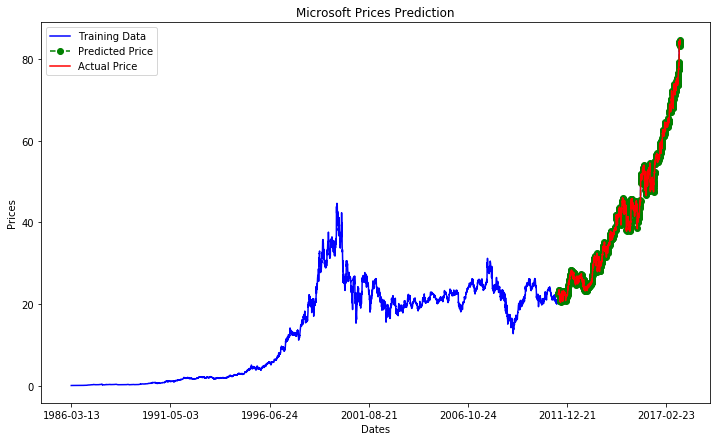

In [25]:
plt.figure(figsize=(12,7))
plt.plot(df['Open'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('Microsoft Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,7982, 1300), df['Date'][0:7982:1300])
plt.legend()

With the matplotlib library, this code plots the actual MSFT stock prices, the predicted prices generated by an ARIMA model, and the training data used to train the model. The code is broken down as follows:

Figure(figsize=(12,7)) creates a 12-inch-by-7-inch figure.

To create three lines on the graph, two plot() functions are called. In the first line, the training data is plotted in green and labeled 'Training Data'. Plotted in green with circular markers and a dashed line, the second line represents the predicted prices. Actual prices are plotted in red and labelled 'Actual Price' on the third line. The entire dataset is represented by the green df['Open'] data.

Title(), xlabel(), and ylabel() are used to set the plot's title, x-axis label, and y-axis label.

To set tick marks on the graph's x-axis, use the xticks() function. Using the np.arange() function, we generate a sequence of numbers from 0 to 7982 in increments of 1300. These are the indices of the dates in the df['Date'] column that will be used as tick marks. Every 1300th date is extracted from the df['Date'] column using the df['Date'][0:7982:1300] expression.

The legend() function creates a legend for the plot. Labels are specified for each line in the plot using the label argument. This legend shows which line corresponds to the training data, predicted prices, and actual prices.

A plot of training data, actual MSFT stock prices, and predicted prices generated by an ARIMA model is shown. Plotting the actual and predicted prices provides an intuitive way to evaluate the ARIMA model's performance. Analysts can determine whether the ARIMA model accurately predicted MSFT stock prices by comparing predicted prices to actual prices.

In [26]:
#test_data['Date'][0:1856:10]

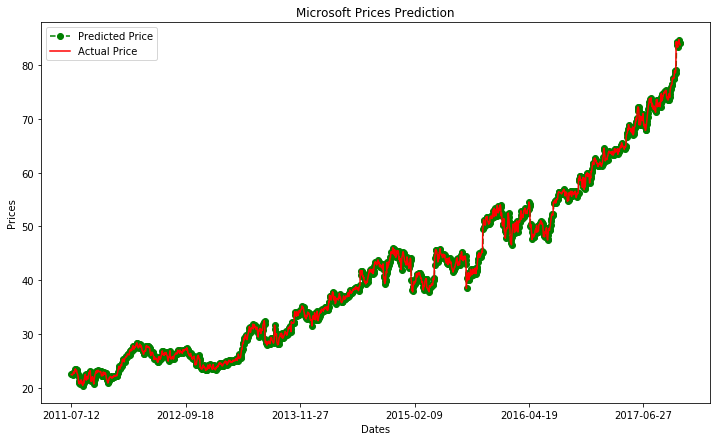

In [27]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('Microsoft Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(6386,7982, 300), df['Date'][6386:7982:300])
plt.legend()

Matplotlib is used to plot the actual MSFT stock prices against the predicted prices generated by the ARIMA model. The code is broken down as follows:

Figure(figsize=(12,7)) creates a 12-inch-by-7-inch figure.

To create two lines on the graph, two plot() functions are called. Plotted in green with circular markers and a dashed line, the first line represents the predicted prices. Actual prices are plotted in red and labeled as 'Actual Price' on the second line.

Title(), xlabel(), and ylabel() are used to set the plot's title, x-axis label, and y-axis label.

The xticks() function sets the tick marks on the graph's x-axis. In increments of 300, the np.arange() function generates a sequence of numbers from 6386 to 7982. The numbers represent the indices of the dates in the df['Date'] column that will be used as tick marks. Every 300th date from the df['Date'] column is extracted using the df['Date'][6386:7982:300] expression.

The legend() function creates a legend for the plot. Labels are specified for each line in the plot using the label argument. There is a legend showing which line corresponds to the predicted and actual prices.

Based on the testing data set, an ARIMA model predicts MSFT stock prices based on the actual prices. An intuitive way to evaluate the performance of the ARIMA model is to compare actual and predicted prices using the plot. MSFT stock prices can be compared to the predicted prices to determine how well the ARIMA model captured the trends and fluctuations.



**Thank you for looking at this notebook, if you have any suggestion, please do not hesitate to comment below!**